# Bibliothèques

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

In [117]:
data=pd.read_csv("./dataset-90380.csv")
data.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


# Implémentation de l'ACP

In [100]:
class ACP:
    def __init__(self,reduit_a=2):
        self.columns=None
        self.n=None
        self.p=None
        self.reduit_a=reduit_a
        self.inertie_cumulee=None
        self.inertie=None
        self.inertie_expliquee=None
        self.R=None
        self.composantes_principales=None
        self.correlations_Xi_Cj=None
        
    # Centrer et réduire les données        
    def __Standardisation(self, df):
        df=(df-df.mean())/df.std()
        return df
    
    #  Calcul des composantes principales   
    def fit_transform(self, df):
        self.columns = df.columns
        self.n, self.p = df.shape
        df=self.__Standardisation(df)
        matrice=np.array(df)
        self.R=(1/len(matrice))*np.dot(np.transpose(matrice),matrice)
        self.inertie, vecteurs_propres = np.linalg.eig(self.R)
        self.inertie = self.inertie[:self.reduit_a]
        self.inertie_expliquee = self.inertie / self.p
        self.inertie_cumulee = np.sum(self.inertie_expliquee)
        self.composantes_principales=np.dot(matrice, vecteurs_propres[:, :self.reduit_a])
        self.correlations_Xi_Cj = vecteurs_propres[:, :self.reduit_a]*np.sqrt(self.inertie)
        return self.composantes_principales
    
    # Calcul de la qualité de représentation de l'individu i par rapport à l'axe factoriel Fj
    def QLTj_indi(self, i=None, j=None):
        return (self.composantes_principales[i-1, j-1]**2)/(np.linalg.norm(matrice[i-1])**2)
    
    # Calcul de la qualité de représentation de la variable Xi par rapport à l'axe factoriel Fj
    def QLTj_Xi(self, i=None, j=None):
        return self.correlations_Xi_Cj[i-1, j-1]**2
    
    # Calcul de la Contribution de l'individu i à la formation de l'axe factoriel Fj
    def CTRj_i(self, i=None, j=None):
        return (1/self.n)*self.composantes_principales[i-1, j-1]**2/self.inertie[j-1]
    
    def cercle_corr(self):
        fig, ax = plt.subplots()
        
        cercle = plt.Circle((0, 0), 1, fill=False, color='black', linestyle='dotted')
        ax.add_patch(cercle)
        
        for i in range(self.p):
            ax.arrow(0, 0, self.correlations_Xi_Cj[i, 0], self.correlations_Xi_Cj[i, 1], color='r')
            ax.text(self.correlations_Xi_Cj[i, 0]+.1, self.correlations_Xi_Cj[i, 1]+.1, self.columns[i], color='b')
        
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)
        ax.set_aspect('equal', 'box')
        
        plt.title("Cercle de Corrélation - ACP")
        plt.xlabel("F1")
        plt.ylabel("F2")
        plt.grid(True)
        plt.show()

In [140]:
acp2 = ACP(reduit_a=3)
res = acp2.fit_transform(data)
res

array([[ 9.75660448e-01,  1.12200121e+00,  1.54696581e-01],
       [ 1.93053788e+00,  1.06242692e+00, -4.34175454e-01],
       [ 1.74544285e+00, -7.38459537e-01, -8.26264240e-01],
       [-1.39998944e-01,  1.10854226e+00, -1.80973554e-01],
       [ 2.49861285e+00, -1.52742672e+00, -3.38559240e-01],
       [ 1.49934074e+00, -9.77629657e-01,  1.45016417e-03],
       [-1.34499236e+00, -1.07798362e+00, -1.17278736e-01],
       [ 4.72298063e-02, -3.22088903e-01, -8.73113315e-01],
       [ 2.98275967e+00,  3.88342469e-02, -9.53170415e-02],
       [ 1.62280742e+00,  1.26608838e+00,  1.06597446e+00],
       [-9.03484479e-01, -1.55467609e+00,  8.93733198e-01],
       [-1.62331903e+00,  2.08852533e-01, -4.94087852e-01],
       [ 1.36505197e+00, -6.74988340e-01, -1.20794916e-01],
       [-5.00381218e-01, -1.50039262e-01,  4.20397595e-01],
       [-2.23099579e+00, -1.03008276e-01,  1.73794699e-02],
       [-7.88872062e-01, -2.67449413e-01,  2.04421034e-01],
       [-7.43312561e-01,  9.48807476e-01

In [141]:
acp2.inertie_cumulee

0.892642020757697

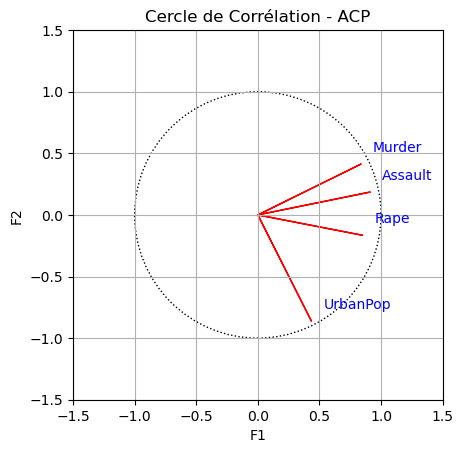

In [122]:
acp2.cercle_corr()

In [127]:
df= pd.DataFrame(res, columns=["F1", "F2", "F3"])

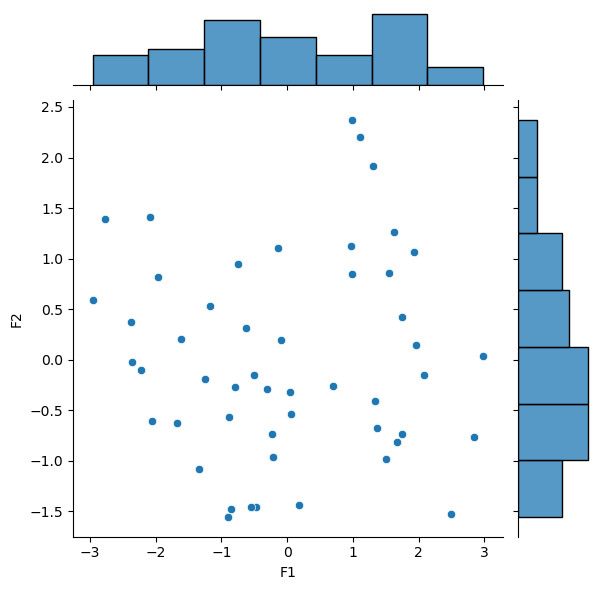

In [133]:
sns.jointplot(data=df,x="F1",y="F2");

In [134]:
fig=px.scatter_3d(df, x="F1", y="F2", z="F3")
fig.show()

# Evaluation de notre implémentation de l'ACP contre PCA définie dans la bibliothèque scikit-learn

In [135]:
pca = PCA(n_components=2)

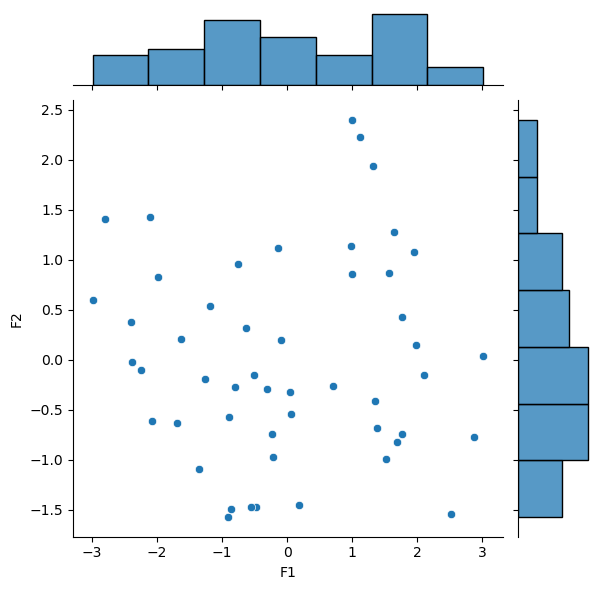

In [139]:
SC=StandardScaler()
d=SC.fit_transform(data)
d = pca.fit_transform(d)
df1= pd.DataFrame(d, columns=["F1", "F2"])
sns.jointplot(data=df1,x="F1",y="F2");